### Harvard GSD  J-Term 2121 
### Introduction to Data Science for Building Simulation
***
Instructor: Jung Min Han, jhan2@gsd.harvard.edu <br>
Date/Time: Jan 11-15/ 9:00 - 11:00 a.m. <br>
***

In [1]:
# import library
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

##  Visualization

In [11]:
## Read data
# f = open("myFile.txt", "r")
# print(f.read())

In [4]:
## Import data to pandas dataframe
dataRad = pd.read_csv('myFile.txt', sep=",", header=None)
dataRad[0]

0       19.5
1       19.5
2       19.5
3       19.5
4       19.5
        ... 
3035     1.5
3036     2.5
3037     3.5
3038     4.5
3039     5.5
Name: 0, Length: 3040, dtype: float64

## Visualize exported data

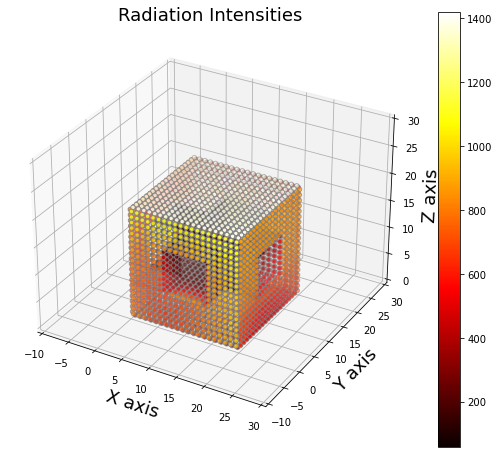

In [5]:
my_cmap = plt.cm.hot

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(dataRad[0], dataRad[1], dataRad[2], 
                 s=20, c=dataRad[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

## Sampling data

In [8]:
## Sampling pandas dataframe
SampledRad = dataRad.sample(n = 1500) 

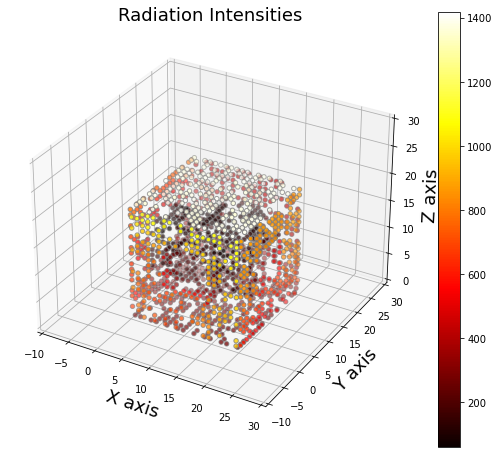

In [9]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(SampledRad[0], SampledRad[1], SampledRad[2], 
                 s=20, c=SampledRad[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

In [10]:
SampledRad.to_csv('sampledRad.csv',index=False)